In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset_new.csv to heart_disease_dataset_new.csv


In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['heart_disease_dataset_new.csv']))
# Dataset is now stored in a Pandas Dataframe

In [10]:
df = df2.copy()
df.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [12]:
import missingno as msno

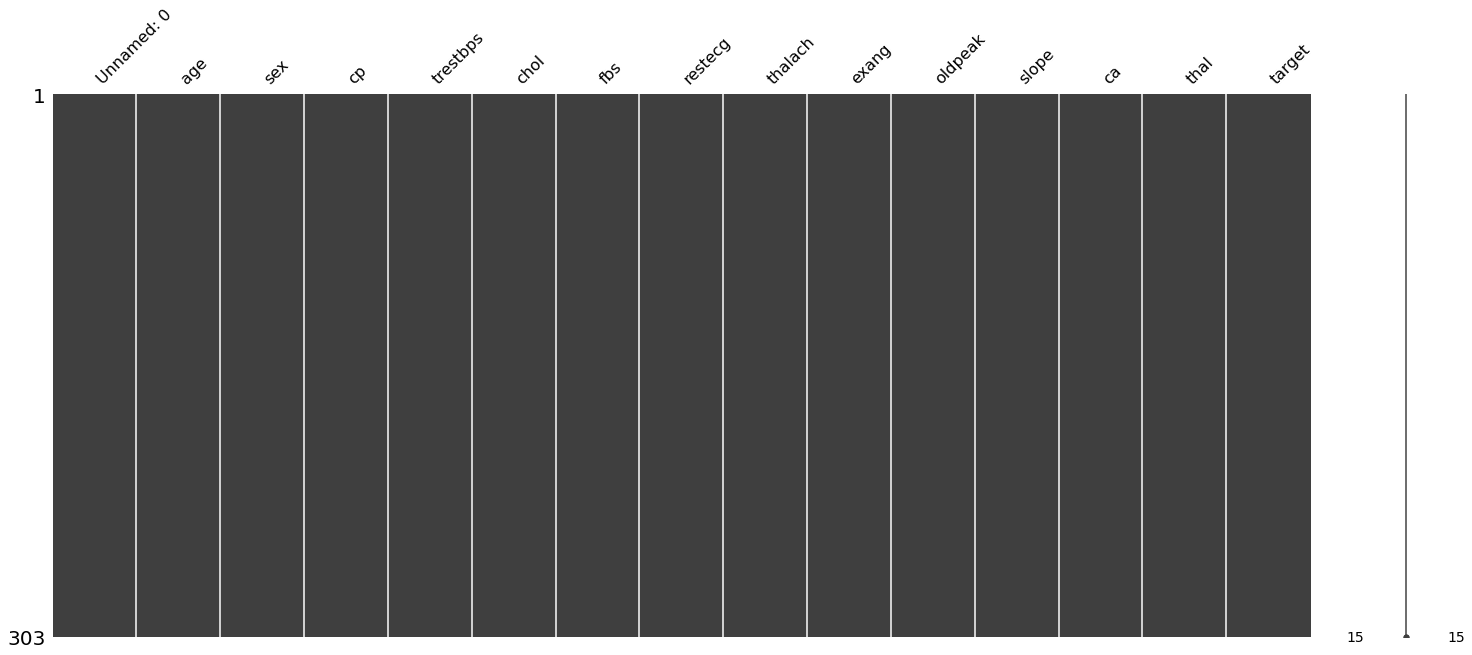

In [13]:
msno.matrix(df)

In [17]:
# Diciding data into train and crossvalidation set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(len(X), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Converting shapes for neural network
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
print(f"Training data input shape (n, m) --> {X_train.shape}")
print(f"Training data output shape (1, m) --> {y_train.shape}")
print(f"Test data input shape (n, m) --> {X_test.shape}")
print(f"Test data output shape (1, m) --> {y_test.shape}")

Training data input shape (n, m) --> (14, 242)
Training data output shape (1, m) --> (1, 242)
Test data input shape (n, m) --> (14, 61)
Test data output shape (1, m) --> (1, 61)


In [23]:
# Sigmoid Activation 
#There are many types of activation functions available. For e.g ReLU, Sigmoid, tanh, Leaky ReLU. For classification problems we use sigmoid activation function.


# We need to initialize two parameters for each of the neurons in each layer: 1) Weight and 2) Bias. 
def initialize_weights(n):        #Initializing weights
    w = np.zeros((n, 1))
    b = 0
    return w, b

In [26]:
#Forward Propagation
def forward_propagation(X, Y, w, b):
    m = len(X)
    Z = np.dot(w.T, X) + b
    A = 1/(1 + np.exp(-Z))
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    return A, cost

In [27]:
#Backward Propagation
def backward_propagation(X, Y, A):
    m = len(X)
    dz = A - Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    return dw, db

In [28]:
def optimizer(X, Y, num_iterations = 100, learning_rate = 0.01):
    w, b = initialize_weights(X_train.shape[0])
    costs = []
    for i in range(num_iterations):
        A, cost = forward_propagation(X, Y, w, b)
        dw, db = backward_propagation(X, Y, A)
        w = w - learning_rate * dw        
        b = b - learning_rate * db
        
        costs.append(cost)
    return w, b

In [29]:
w, b = optimizer(X_train, y_train, num_iterations = 100, learning_rate = 0.5)

<ipython-input-26-59376cdfc574>:5: RuntimeWarning: overflow encountered in exp
  A = 1/(1 + np.exp(-Z))
<ipython-input-26-59376cdfc574>:6: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-26-59376cdfc574>:6: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


In [30]:
def predictions(X, Y, w, b):
    preds = np.zeros((1, X.shape[1]))
    m = len(X)
    Z = np.dot(w.T, X) + b
    A = 1/(1 + np.exp(-Z))
    for i in range(A.shape[1]):
        if A[0][i] >= 0.5:
            preds[0][i] = 1
        else:
            preds[0][i] = 0
    return preds
            
preds = predictions(X_test, y_test, w, b)

<ipython-input-30-84e5ef60cafd>:5: RuntimeWarning: overflow encountered in exp
  A = 1/(1 + np.exp(-Z))


In [31]:
accuracy = (len(preds[preds == y_test])/len(y_test[0])) * 100
accuracy

98.36065573770492

In [32]:
preds

array([[0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.]])